In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


pd.set_option('display.max_columns', None)
df = pd.read_csv("madrid_rental_properties_details.csv")
df.head(2)


,url,property_native_id,rent_eur_per_month,barrio,distrito,latitude,longitude,listing_type,scrape_status,scraped_timestamp,description,energy_certificate_main_classification,energy_consumption_rating,energy_consumption_value,energy_emissions_rating,energy_emissions_value,Adaptado a personas con movilidad reducida,Agua,Aire acondicionado,Amueblado,Antigüedad,Armarios empotrados,Ascensor,Balcón,Baños,Calefacción,Calle alumbrada,Calle asfaltada,Carpintería exterior,Carpintería interior,Chimenea,Cocina equipada,Comedor,Conservación,Exterior,Garaje,Gas,Gastos de comunidad,Habitaciones,Interior,Jardín,Lavadero,Luz,No se aceptan mascotas,Orientación,Piscina,Planta,Portero automático,Puerta blindada,Referencia,Se aceptan mascotas,Sistema de seguridad,Soleado,Superficie construida,Superficie solar,Superficie útil,Teléfono,Terraza,Tipo de casa,Tipo suelo,Trastero,Urbanizado,Vidrios dobles,page_source
0,https://www.pisos.com/alquilar/atico-salamanca...,5.174066e+10,10000.0,Castellana,Salamanca,"40,4342811","-3,6862864",rental,Success,2025-05-28T19:53:30.586256,DISPONIBLE DE MANERA INMEDIATA HousinGo presen...,Pendiente de completar,NaN,NaN,NaN,NaN,NaN,True,Frío y calor,NaN,NaN,NaN,True,NaN,5.0,Eléctrica,NaN,NaN,NaN,NaN,NaN,True,NaN,A estrenar,True,2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6ª,NaN,NaN,6013,NaN,NaN,NaN,272 m²,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,1
1,https://www.pisos.com/alquilar/atico-rio_rosas...,5.423369e+10,1450.0,Río Rosas,Chamberí,"40,4386119","-3,6999008",rental,Success,2025-05-28T19:53:32.370621,DISPONIBLE A PARTIR DEL 25 DE JUNIO DE 2025 Ho...,En trámite,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,True,NaN,1.0,Eléctrica,NaN,NaN,NaN,NaN,NaN,True,NaN,En buen estado,True,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Sur,NaN,6ª,NaN,NaN,3893,NaN,NaN,NaN,74 m²,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,1


Renombro la columna precio para poder usar el mismo código de venta y despues poder unir los dos df´s y que no de problema esta columna

In [2]:
df.rename(columns={'rent_eur_per_month': 'price_eur'}, inplace=True)

Grafico y elimino los outs

In [6]:

Q1 = df['price_eur'].quantile(0.25)
Q3 = df['price_eur'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df['outlier'] = (df['price_eur'] < lower_bound) | (df['price_eur'] > upper_bound)



<span style="color: blue">Histograma donde los outliers están en rojo y los valores normales en azul.</span>

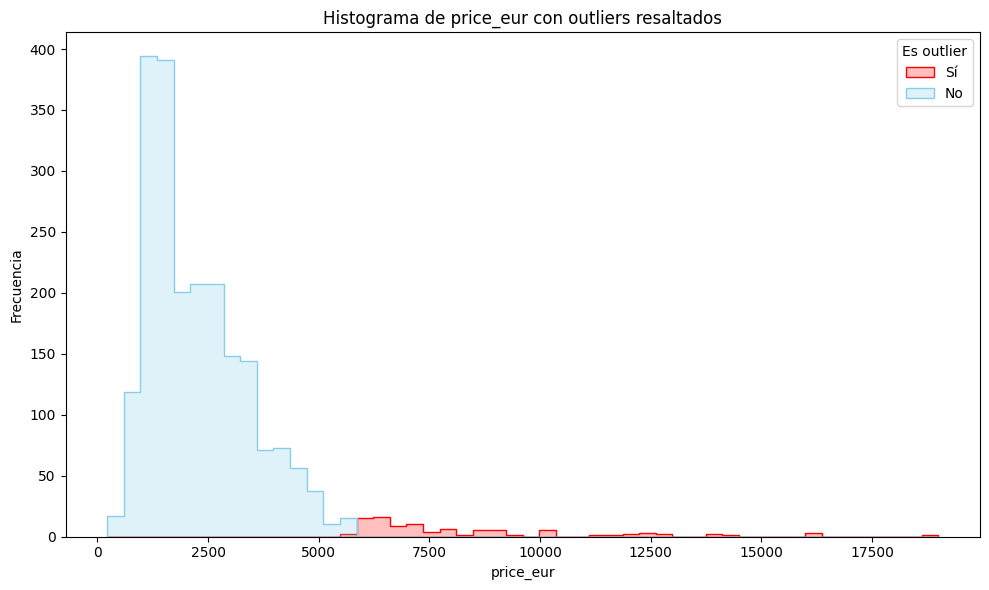

In [7]:

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='price_eur', hue='outlier', bins=50, palette={False: 'skyblue', True: 'red'}, element='step', kde=False)

plt.title('Histograma de price_eur con outliers resaltados')
plt.xlabel('price_eur')
plt.ylabel('Frecuencia')
plt.legend(title='Es outlier', labels=['Sí', 'No'])
plt.tight_layout()
plt.show()

<span style="color: blue">Relación entre precio y superficie</span>

In [9]:
# Calcular el precio medio por metro cuadrado por barrio
df_filtrado = df.dropna(subset=['barrio', 'Superficie construida', 'price_eur'])
df_filtrado = df_filtrado[df_filtrado['Superficie construida'] > 0]

df_filtrado['precio_m2'] = df_filtrado['price_eur'] / df_filtrado['Superficie construida']
precio_m2_barrio = df_filtrado.groupby('barrio')['precio_m2'].mean().sort_values(ascending=False)

print(precio_m2_barrio)

barrio
Prosperidad             305.536111
Quintana                 38.333333
Arapiles                 36.557618
Ciudad Universitaria     36.250880
Gaztambide               33.471412
                           ...    
El Pardo                 13.261068
Fuentelarreina           13.115057
Rosas                    12.710862
Colina                   12.353325
Entrevías                12.222222
Name: precio_m2, Length: 127, dtype: float64


In [10]:
#Limpio la columna
#df["Superficie construida"] = df["Superficie construida"].str.replace(' m²', '').astype(float)

Q1 = df['Superficie construida'].quantile(0.25)
Q3 = df['Superficie construida'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['outlier'] = (df['Superficie construida'] < lower_bound) | (df['Superficie construida'] > upper_bound)
df_sin_outliers = df[(df['Superficie construida'] >= lower_bound) & (df['Superficie construida'] <= upper_bound)]
df = df_sin_outliers.copy()


In [11]:
df['precio_m2'] = df['price_eur'] / df['Superficie construida']

<span style="color: blue">Grafico el precio por metro cuadrado por barrio</span>

In [ ]:


fig = px.scatter(
    df,
    x='Superficie construida',
    y='price_eur',
    color='barrio', 
    hover_data=['price_eur', 'Superficie construida', 'barrio'], 
    title='Precio vs Superficie Construida segmentado por barrio',
    labels={'superficie_construida': 'Superficie Construida (m²)', 'price_eur': 'Precio'}
)

fig.show()

<span style="color: blue">Relación entre precio y antiguedad</span>

La antiguedad la he mapeado en una cifra media de años para ver la relacion con el precio, parace que la columna no está muy relacionada

In [19]:
df["Antigüedad"].unique()
print(df['Antigüedad'].value_counts())

Antigüedad
Más de 50 años        452
Entre 30 y 50 años    145
Menos de 5 años       117
Entre 20 y 30 años     92
Entre 10 y 20 años     58
Entre 5 y 10 años      25
Name: count, dtype: int64


Mientras que en la venta veíamos una leve relación negativa, en el alquiler vemos una relación positiva, pueda ser por factores exógenos a la columna como el tipo de inmueble o el barrio en que se encuentra.

In [20]:
mapa_antiguedad = {
    "Menos de 5 años": 3,
    "Entre 5 y 10 años": 7,
    "Entre 10 y 20 años": 15,
    "Entre 20 y 30 años": 25,
    "Entre 30 y 50 años": 40,
    "Más de 50 años": 60
}

df["antiguedad_valor"] = df["Antigüedad"].map(mapa_antiguedad)
print(df[["antiguedad_valor", "price_eur"]].corr())

                  antiguedad_valor  price_eur
antiguedad_valor           1.00000    0.04295
price_eur                  0.04295    1.00000


(he eliminado los puntos de outs y alargado el box en vertical para que la diferencia en el precio se aprecie mejor, )

En la figura se puede apreciar una leve fluctuación del precio de alquiler en relación a la antigüedad, aunque hay que puntualizar que una diferencia de 300€ al mes es 1/4 del SMI.

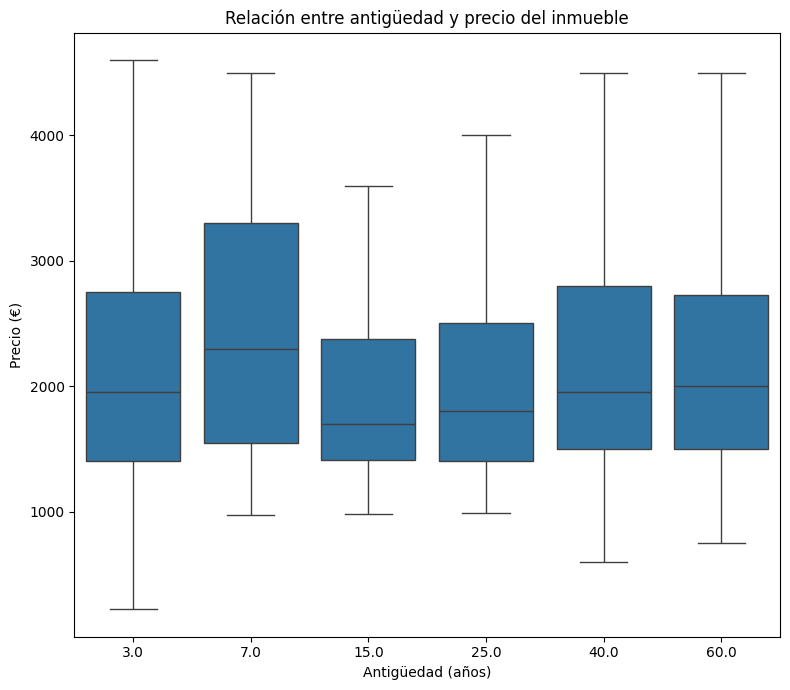

In [23]:
plt.figure(figsize=(8,7))
sns.boxplot(data=df, x='antiguedad_valor', y='price_eur', showfliers=False)
plt.title('Relación entre antigüedad y precio del inmueble')
plt.xlabel('Antigüedad (años)')
plt.ylabel('Precio (€)')
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------

precio medio por barrio, esta columna puede serle bastante útil al modelo

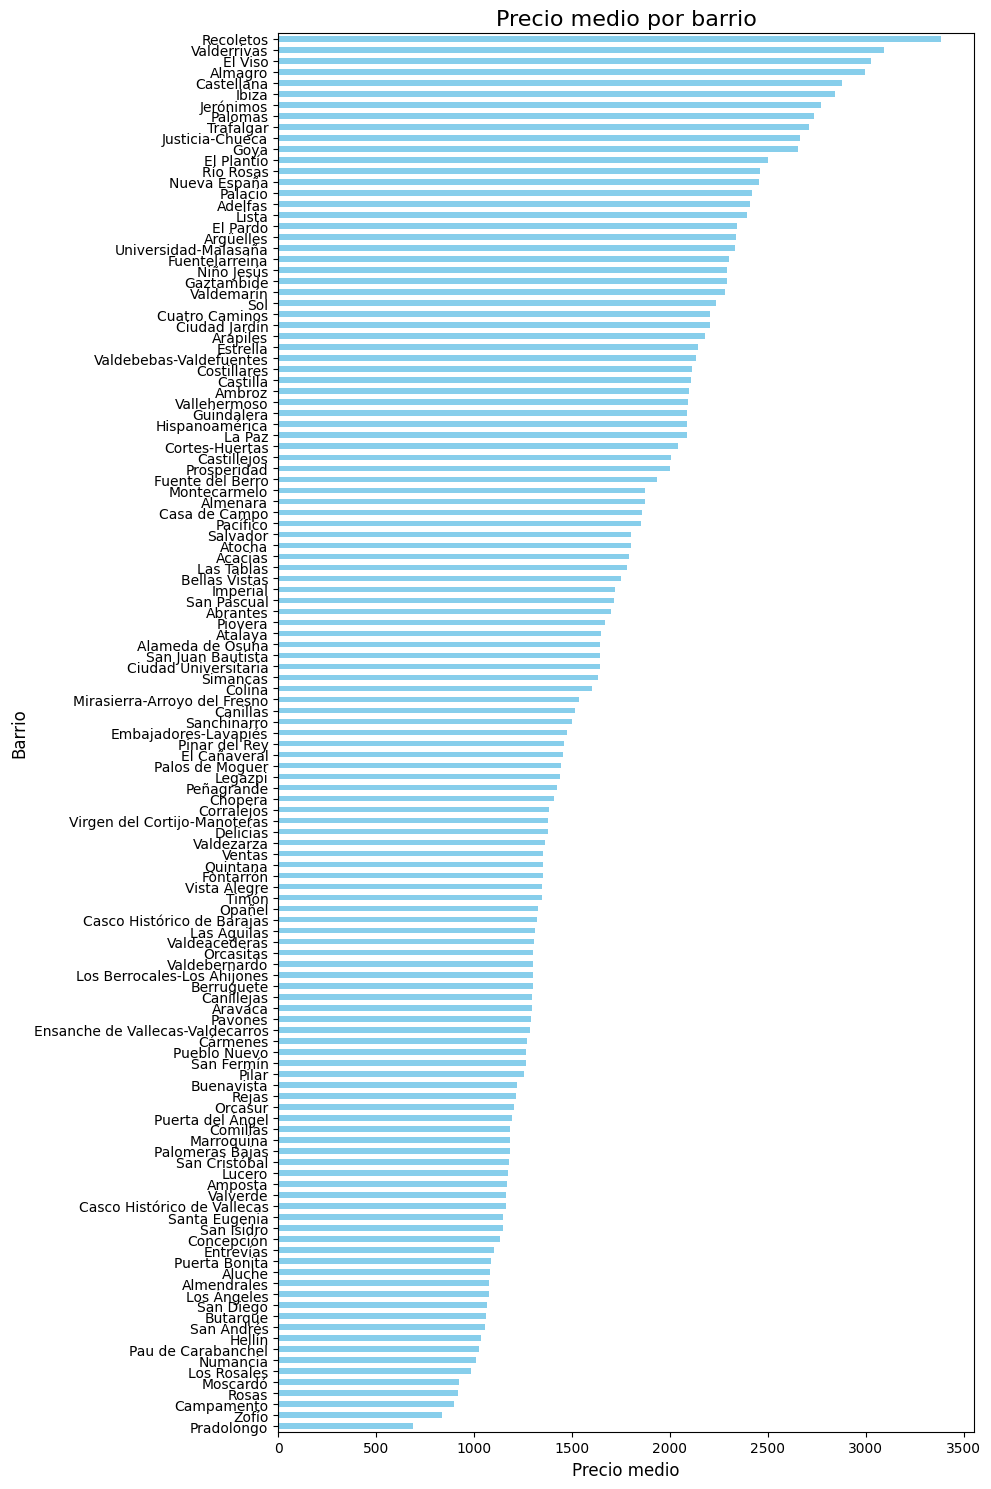

In [27]:
# gráfico del precio medio por barrio (vertical)

precio_medio_por_barrio = df.groupby('barrio')['price_eur'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 15))
precio_medio_por_barrio.plot(kind='barh', color='skyblue')
plt.title('Precio medio por barrio', fontsize=16)
plt.xlabel('Precio medio', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.tight_layout()
plt.show()




<span style="color: blue"> Relación entre habitaciones y precio.</span>

En este gráfico se ve un crecimiento entre el número de habitaciones y precio, pero el crecimiento no es tan directo como en las ventas, lo que sugiere que hay otro factor que es más determinante al precio de alquiler que el número de habitaciones.

PD. Dmytri comentó que él hizo un modelo y que su matriz no daba importancia a esta columna tomaba como referencia el número de baños y los metros

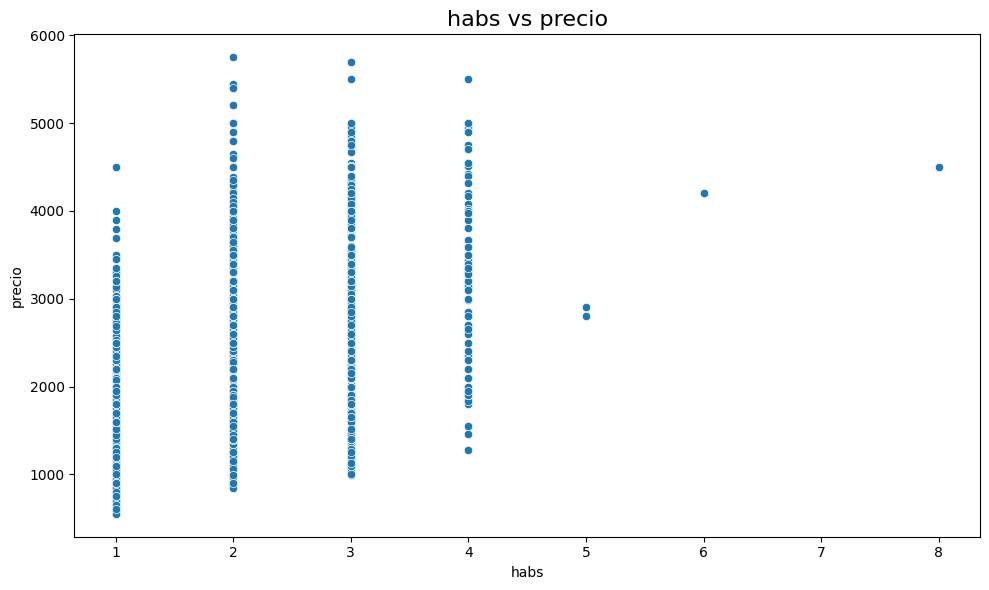

In [28]:
#relaión entre habitaciones y precio

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Habitaciones', y='price_eur')
plt.title('habs vs precio', fontsize=16)
plt.xlabel('habs')
plt.ylabel('precio')
plt.tight_layout()
plt.show()

<span style="color: blue">Inmuebles adaptados por barrio</span>

He graficado la relación de inmuebles adaptados por barrio. En primer lugar está Sol y en segundo (omito el "otros") está Cortes. 
No lo he referenciado a precio porque al no coincidir con la relación de precio medio por barrio no me parece significativa para la predicción.
Asumiría que Sol y Cortes son barrios envejecidos, pero esto es más una apreciación anecdótica que útil.

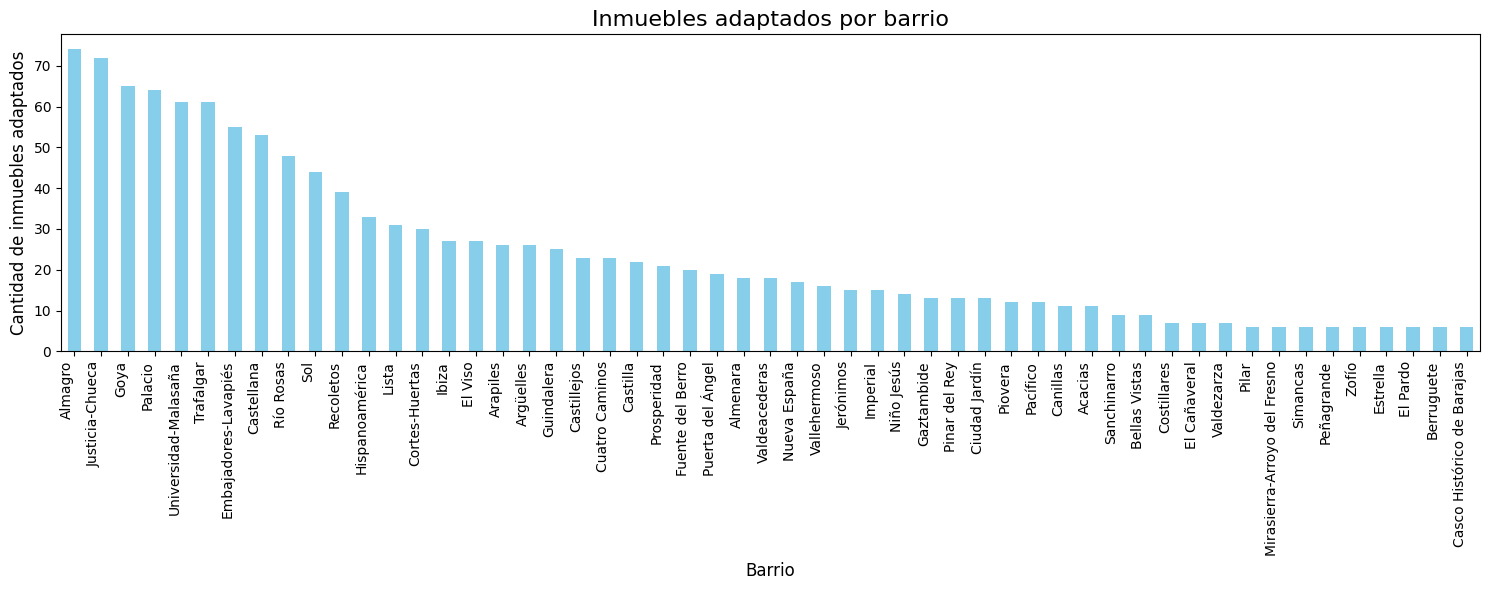

In [12]:
# Relación entre "Adaptado a personas con movilidad reducida" y "barrio"

df = df[~df['tipo_inmueble'].isin(['Garaje', 'Otro'])]

adaptado_barrio = df.groupby('barrio')['Adaptado a personas con movilidad reducida'].apply(lambda x: x.notna().sum()).sort_values(ascending=False)

adaptado_barrio = adaptado_barrio[adaptado_barrio > 5]

plt.figure(figsize=(15, 6))
adaptado_barrio.plot(kind='bar', color='skyblue')
plt.title('Inmuebles adaptados por barrio', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Cantidad de inmuebles adaptados', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


<span style="color: blue">Diferencia de precio entre pisos adaptados y no adaptados</span>

En este caso vemos que hay un cifra negativa en relación entre precio y que el inmueble esté adaptdo, es una cifra insignificante, pero nos da una pista clara de la importancia de este punto en la relación al pecio del alquiler

In [31]:
df["Adaptado a personas con movilidad reducida"] = df["Adaptado a personas con movilidad reducida"].apply(
    lambda x: 1 if str(x).strip().lower() in ["sí", "si", "true", "1"] else 0
)

adaptado = df[df["Adaptado a personas con movilidad reducida"] == 1]["price_eur"]
no_adaptado = df[df["Adaptado a personas con movilidad reducida"] == 0]["price_eur"]

# Promedios
print("Precio medio (adaptado):    ", round(adaptado.mean(), 2))
print("Precio medio (no adaptado): ", round(no_adaptado.mean(), 2))

# diferencia de medias
print(f"los inmuebles adaptados cuestan una media de : { round(adaptado.mean())-round(no_adaptado.mean())} más que los no adaptados")


Precio medio (adaptado):     2098.04
Precio medio (no adaptado):  2119.58
los inmuebles adaptados cuestan una media de : -22 más que los no adaptados


<span style="color: blue">Diferencia de precio entre pisos con y sin Aire Acondicionado</span>

Vemos que la diferencia media entre pisos con y sin aire acondicionados es mínima. Aunque la dsitancia según barrios puede hacernos pensar que hay más motivos para esta diferencia.

In [34]:
#limpieza del df
valores_aire_acondicionado = {'Frío y calor', 'Frío', 'Individual',
       'Splits y unidades', 'A/a f/c', 'Comunitario', 'Aerotermia',
       'Frío-calor', 'Con bomba de calor', 'Centralizado',
       'A/a por conductos con sistema airzone', 'Tambien suelo radiante',
       'A/a f/c centralizado', 'En toda la casa', 'De ventana',
       'Por conductos independientes', 'Por conductos'}
df['Aire acondicionado'] = df['Aire acondicionado'].isin(valores_aire_acondicionado)

In [104]:

df_filtrado = df.dropna(subset=['Aire acondicionado', 'price_eur', 'barrio'])
df_filtrado = df_filtrado[df_filtrado['Aire acondicionado'].isin([True, False])]


con_aa = df_filtrado[df_filtrado['Aire acondicionado'] == True]['price_eur']
sin_aa = df_filtrado[df_filtrado['Aire acondicionado'] == False]['price_eur']

media_con_aa = con_aa.mean()
media_sin_aa = sin_aa.mean()
diferencia = media_con_aa - media_sin_aa

print(f"Con AA: {media_con_aa:.2f} ")
print(f"Sin AA: {media_sin_aa:.2f} ")
print(f"Dif: {diferencia:.2f} ")

#
conteo_por_barrio = df_filtrado['barrio'].value_counts()
barrios_validos = conteo_por_barrio[conteo_por_barrio > 10].index
df_filtrado = df_filtrado[df_filtrado['barrio'].isin(barrios_validos)]

medias = df_filtrado.groupby(['barrio', 'Aire acondicionado'])['price_eur'].mean().unstack()

medias['diferencia'] = medias[True] - medias[False]

diferencias = medias['diferencia'].sort_values(ascending=False)
print(diferencias)

Con AA: 2214.55 
Sin AA: 2196.91 
Dif: 17.64 
barrio
Jerónimos               1096.153846
Pacífico                 854.285714
Recoletos                772.888889
Ciudad Jardín            532.361111
Justicia-Chueca          467.355436
Fuente del Berro         426.956522
Peñagrande               423.000000
Almagro                  355.972906
Hispanoamérica           332.058824
El Viso                  330.909091
Prosperidad              291.746032
Sanchinarro              265.000000
Acacias                  245.833333
Canillas                 198.636364
Almenara                 193.081197
Ibiza                    171.863636
Bellas Vistas             99.090909
Castillejos               90.705882
Berruguete                 1.111111
Trafalgar                -26.176471
Argüelles                -28.357143
Embajadores-Lavapiés     -30.385580
Sol                     -103.329487
Río Rosas               -120.095238
Cuatro Caminos          -137.200000
Nueva España            -149.805195
Lista      

<span style="color: blue">DIferencia entre pisos según su amueblado</span>

Vemos la diferencia de precios entre pisos amueblados y semiamueblados, no hago discriminación de barrios porque tomará la misma media y no hay una diferencia objetiva para hacerla.

In [ ]:

columnas_a_llenar = ['Amueblado']

for col in columnas_a_llenar:
    if col in df.columns:
        df[col].fillna('Desconocido', inplace=True)

# Categorización amueblado
valores_si = {
    'Completamente amueblado', 'Muebles de diseño', 'De forma minimalista y funcional', 
    'Totalmente', 'Con muebles de diseño', 'Cocina amueblada', 'Completo', 'Moderno y actual'
}

valores_semi = {
    'Solo la cocina y los baños', 'Semi-amueblado', 'Semi amueblado',
    'Opcional amueblado/vacio', 'Puede ser sin amueblar y amueblado',
    'Pueden amueblar la 3ra habitación tambine', 'No muy bien. mala calidad y poco ergonómico.'
}

def categorizar_amueblado(valor):
    if pd.isna(valor):
        return np.nan
    valor_str = str(valor).strip()
    if valor_str in valores_si:
        return 'Si'
    elif valor_str in valores_semi:
        return 'Semi'
    elif valor_str.lower() in {'false', 'no', 'desconocido'}:
        return 'No'
    else:
        return 'Si' 

df['Amueblado'] = df['Amueblado'].apply(categorizar_amueblado)

df_filtrado_2 = df.dropna(subset=['Amueblado', 'price_eur', 'barrio'])

amueblado = df_filtrado_2[df_filtrado_2['Amueblado'] == 'Si']['price_eur']
semi_amueblado = df_filtrado_2[df_filtrado_2['Amueblado'] == 'Semi']['price_eur']
sin_amueblado = df_filtrado_2[df_filtrado_2['Amueblado'] == 'No']['price_eur']


amueblado_mean = amueblado.mean()
semi_amueblado_mean = semi_amueblado.mean()
sin_amueblado_mean = sin_amueblado.mean()
amueblado_vs_semi = amueblado_mean - semi_amueblado_mean
semi_vs_sin = semi_amueblado_mean - sin_amueblado_mean
amueblado_vs_sin = amueblado_mean - sin_amueblado_mean

print(f"amueblado: {amueblado_mean:.2f} €")
print(f"semi amueblado: {semi_amueblado_mean:.2f} €")
print(f"sin amueblado: {sin_amueblado_mean:.2f} €")
print(f"Diferencia amueblado vs semi: {amueblado_vs_semi:.2f} €")
print(f"Diferencia semi amueblado vs sin amueblado: {semi_vs_sin:.2f} €")
print(f"Diferencia amueblado vs sin amueblado: {amueblado_vs_sin:.2f} €")


amueblado: 2322.95 €
semi amueblado: 2406.67 €
sin amueblado: 2035.08 €
Diferencia amueblado vs semi: -83.72 €
Diferencia semi amueblado vs sin amueblado: 371.59 €
Diferencia amueblado vs sin amueblado: 287.87 €


C:\Users\morgo\AppData\Local\Temp\ipykernel_2568\71720341.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<span style="color: blue">DIferencia entre pisos según ssi tienen o no terraza</span>

In [113]:
valores_terraza = {'19 metros', 'No acristalada',
       'Gran mirador para 2 sillas y una mesita.', '24m²',
       'Con vistas al retiro', '2 terrazas', '10', 'mtrs=25',
       'Dos terrazas de 60 m² cada uno', '3 terrazas', '80 metros',
       'Pequeña pero muy mona', 'mtrs=0', '20 m²',
       'En una de las habitaciones', '30 m²', 'De unos 8m²',
       'De unos 15m²', '3m²', 'De 30 m². con toldo y luces',
       'En azotea con vistas de madrid', 'En azotea', 'Mas de 18m²',
       'Terraza-patio ajardinado de uso privativo', 'De unos 10m²',
       '15 m²', '6m²', 'De 40 m².', '30m²',
       '2 balcones + una terraza interior', 'En el dormitorio', '5',
       '3 m²', 'Balcones', '100', '6', 'Y un mirador', 'mtrs=8', 'mtrs=5',
       '20', 'Acristalada', '4', '12', '8', '13', '3', '15', '60', '7',
       '15.00 m²', 'Acristalda', 'Con espacio para mesa y tumbonas',
       'Una a pie de salón y otra amplia en planta alta.', 'Solarium',
       'Orientada al sur'}
df['Terraza'] = df['Terraza'].isin(valores_terraza)

In [114]:

Terraza = df[df["Terraza"] == 1]["price_eur"]
no_Terraza = df[df["Terraza"] == 0]["price_eur"]

con = df[df["Terraza"] == 1]["price_eur"]
sin = df[df["Terraza"] == 0]["price_eur"]

# Promedios
print("Precio medio (con):    ", round(con.mean(), 2))
print("Precio medio (sin): ", round(sin.mean(), 2))

# diferencia de medias
print(f"los inmuebles con  cuestan una media de : { round(con.mean())-round(sin.mean())} más que los sin")

Precio medio (con):     2814.67
Precio medio (sin):  2206.55
los inmuebles con  cuestan una media de : 608 más que los sin


<span style="color: blue">DIferencia entre pisos según si tienen o no Garaje</span>

In [105]:
valores_garaje ={'1', '2', 'Más de 2'}
df['Garaje'] = df['Garaje'].isin(valores_garaje)

con = df[df["Garaje"] == 1]["price_eur"]
sin = df[df["Garaje"] == 0]["price_eur"]

# Promedios
print("Precio medio (con):    ", round(con.mean(), 2))
print("Precio medio (sin): ", round(sin.mean(), 2))

# diferencia de medias
print(f"los inmuebles con  cuestan una media de : { round(con.mean())-round(sin.mean())} más que los sin")

Precio medio (con):     2618.33
Precio medio (sin):  2134.52
los inmuebles con  cuestan una media de : 483 más que los sin


<span style="color: blue">DIferencia entre pisos según ssi tienen o no piscina</span>

In [115]:
valores_piscina = {'Propia', 'Comunitaria', 'Privada'}
df['Piscina'] = df['Piscina'].isin(valores_piscina)

con = df[df["Piscina"] == 1]["price_eur"]
sin = df[df["Piscina"] == 0]["price_eur"]

# Promedios
print("Precio medio (con):    ", round(con.mean(), 2))
print("Precio medio (sin): ", round(sin.mean(), 2))

# diferencia de medias
print(f"los inmuebles con  cuestan una media de : { round(con.mean())-round(sin.mean())} más que los sin")

Precio medio (con):     2415.81
Precio medio (sin):  2204.35
los inmuebles con  cuestan una media de : 212 más que los sin


<span style="color: blue">DIferencia entre pisos según si tienen o no ascensor</span>

In [12]:
#DIferencia de precio entre pisos con y sin ascensor
df["Ascensor"] = df["Ascensor"].apply(lambda x: 1 if pd.notna(x) else 0)

Ascensor = df[df["Ascensor"] == 1]["price_eur"]
no_Ascensor = df[df["Ascensor"] == 0]["price_eur"]

# Promedios
print("Precio medio (Ascensor):    ", round(Ascensor.mean(), 2))
print("Precio medio (no Ascensor): ", round(no_Ascensor.mean(), 2))

# Test de diferencia de medias
print(f"los inmuebles con ascensor cuestan una media de : { round(Ascensor.mean())-round(no_Ascensor.mean())} más que los no ascensor")

Precio medio (Ascensor):     2368.51
Precio medio (no Ascensor):  1805.57
los inmuebles con ascensor cuestan una media de : 563 más que los no ascensor


<span style="color: blue">DIferencia entre pisos según el número de baños</span>

Como he comentado antes, Dmytri comentó que su modelo valoraba el número de baños más que el de habitaciones.


En el gráfico vemos que el precio de la propiedad crece en realción directa a número de baños (es lógico ya que también está directamente relacionado con los metros cuadrados del inmueble).


In [ ]:
df['Superficie construida'] = (
    df['Superficie construida']
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')[0] 
    .astype(float)  
)

In [119]:
# Función para rellenar baños si es NaN
def rellenar_banos(row):
    if pd.isna(row['Baños']):
        if not pd.isna(row['Superficie construida']):
            return max(1, round(row['Superficie construida'] / 70)) 
        else:
            return 1   # Al menos 1 baño
    else:
        return int(row['Baños'])

df['Baños'] = df.apply(rellenar_banos, axis=1)


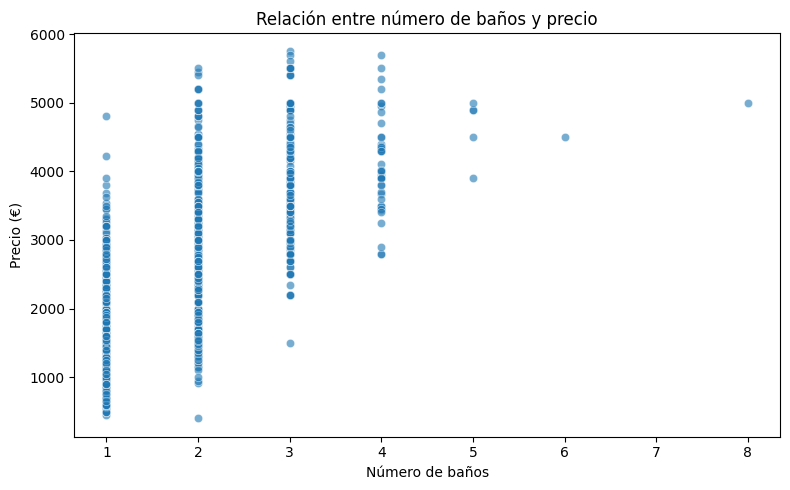

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_filtrado, x="Baños", y="price_eur", alpha=0.6)

plt.title("Relación entre número de baños y precio")
plt.xlabel("Número de baños")
plt.ylabel("Precio (€)")
plt.tight_layout()
plt.show()


<span style="color: blue">relaicón entre el precio, número de baños y número de habitaciones.</span>

En este gráfico se puede ver una clara línea ascendente

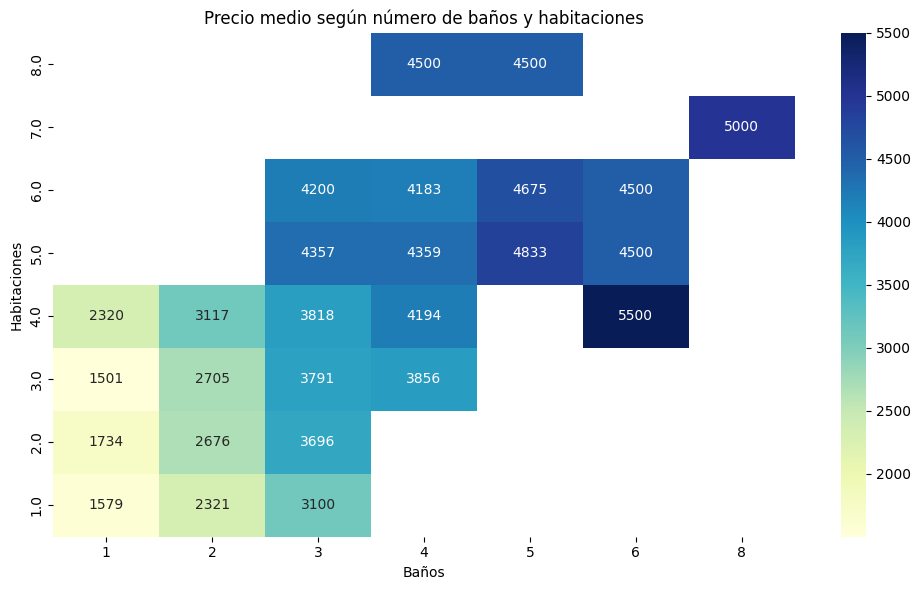

In [123]:
# Crear tabla dinámica
pivot_table = df.pivot_table(
    index='Habitaciones',
    columns='Baños',
    values='price_eur',
    aggfunc='mean'
)

pivot_table = pivot_table.sort_index(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Precio medio según número de baños y habitaciones")
plt.xlabel("Baños")
plt.ylabel("Habitaciones")
plt.tight_layout()
plt.show()


En conservación los resultados son los esperados, los reformados y los a estrenar son más caros que los ue están en buen estado y a reformar

In [ ]:
 df["Conservación"].unique()

array(['En buen estado', nan, 'Reformado', 'A reformar', 'A estrenar'],
      dtype=object)

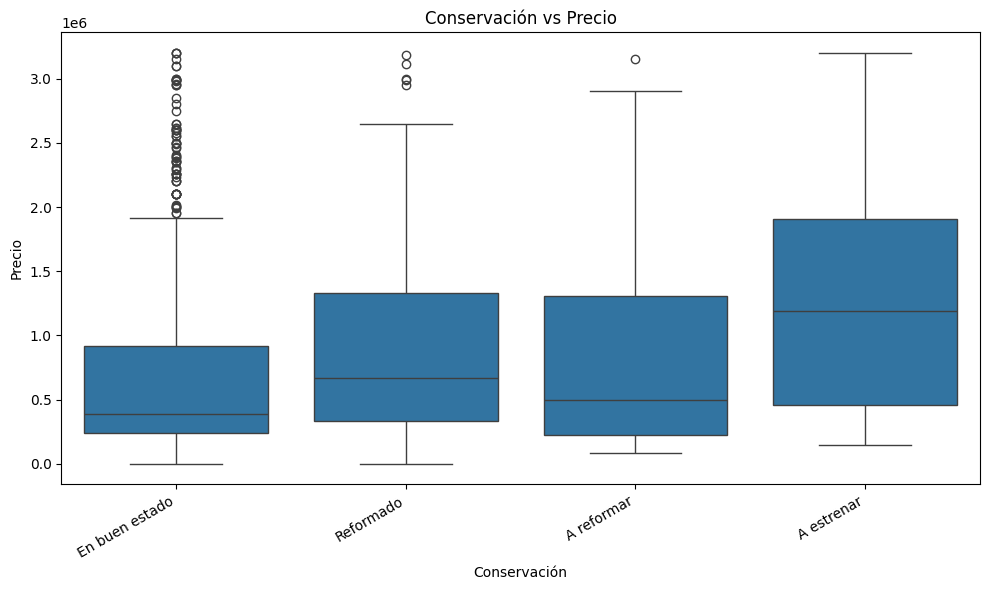

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Conservación', y='price_eur')
plt.title('Conservación vs Precio')
plt.xlabel('Conservación')
plt.ylabel('Precio')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Para la planta he asignado el semisótano y entresuelo un -1 y un 0 a bajo y principal y he graficado en relación al preico.
La fluctuación de Boxplots en las plantas me hace pensar que no está muy relacionado con el precio en la compra-venta de pisos, esta relación será incluso menos acentuada en el alquiler.

In [ ]:
df["Planta"].unique()

array(['2ª', nan, '3ª', '1ª', '5ª', '4ª', '6ª', 'Bajo', '7ª', '8ª', '10ª',
       'Semisótano', '9ª', '12ª', 'Entresuelo', 'Principal', '11ª',
       'Más de 20', '14ª', '16ª', '17ª'], dtype=object)

In [ ]:
def normalizar_planta(Planta):
    if pd.isna(Planta):
        return Planta
    planta = str(Planta).strip().lower()
    if "semisótano" in planta or "entresuelo" in planta:
        return -1
    if "principal" in planta or "bajo" in planta:
        return 0
    if "más de 20" in planta:
        return 20
    planta = planta.replace("ª", "").replace("º", "")
    try:
        return int(planta)
    except ValueError:
        return Planta  

df["Planta_normalizada"] = df["Planta"].apply(normalizar_planta)
print(df["Planta_normalizada"].unique())


[ 2. nan  3.  1.  5.  4.  6.  0.  7.  8. 10. -1.  9. 12. 11. 20. 14. 16.
 17.]


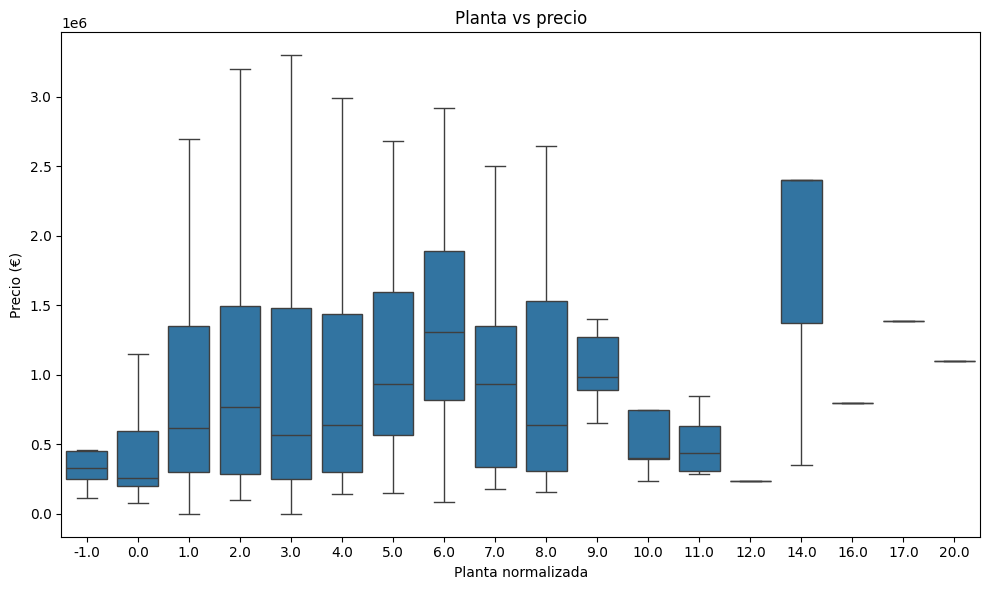

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Planta_normalizada', y='price_eur', showfliers=False)
plt.title('Planta vs precio')
plt.xlabel('Planta normalizada')
plt.ylabel('Precio (€)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

barrio
El Plantío        194858.153362
El Pardo           92050.583152
Cortes-Huertas     37777.304645
Recoletos          14110.998101
Jerónimos          11878.097424
                      ...      
Los Ángeles         2614.623053
Entrevías           2500.244321
San Fermín          2363.651005
Orcasitas           2028.731300
San Cristóbal       1992.221364
Name: precio_m2, Length: 133, dtype: float64


El resto de columnas las considero prescindibles, bien sea por la dificultad de limpieza o por la poca relevancia que tienen para el análisis.